In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
sns.set(rc={'figure.figsize':(15,8)})

In [510]:
df=pd.read_csv('train.csv')

In [511]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [513]:
df.duplicated().sum()

0

In [515]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [516]:
df.drop('Outlet_Size',axis=1,inplace=True)

In [497]:
#from sklearn.impute import KNNImputer

In [498]:
#imputer=KNNImputer(n_neighbors=7)

In [499]:
#im_df=imputer.fit_transform(df[['Item_Weight']])

In [500]:
#df['Item_Weight']=pd.DataFrame(data=im_df,columns=imputer.get_feature_names_out())

In [501]:
#df['Item_Weight']=df.groupby(by=['Item_Type'])['Item_Weight'].apply(lambda i:i.fillna(i.mean))

In [517]:
df['Item_Weight']=df.groupby('Item_Type')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))

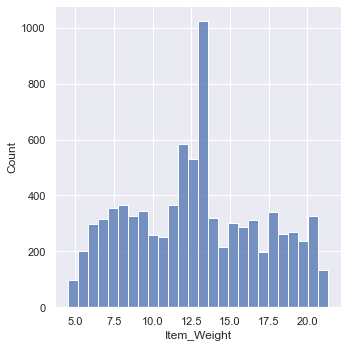

In [518]:
sns.displot(data=df,x='Item_Weight')

In [455]:
for feature  in df.select_dtypes('object').columns:
    print(feature,':-  ',df[feature].unique(),"   ","Unique Values:",df[feature].nunique())

Item_Identifier :-   ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']     Unique Values: 1559
Item_Fat_Content :-   ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']     Unique Values: 5
Item_Type :-   ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']     Unique Values: 16
Outlet_Identifier :-   ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']     Unique Values: 10
Outlet_Location_Type :-   ['Tier 1' 'Tier 3' 'Tier 2']     Unique Values: 3
Outlet_Type :-   ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']     Unique Values: 4


In [456]:
df.drop('Item_Identifier',axis=1 , inplace=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

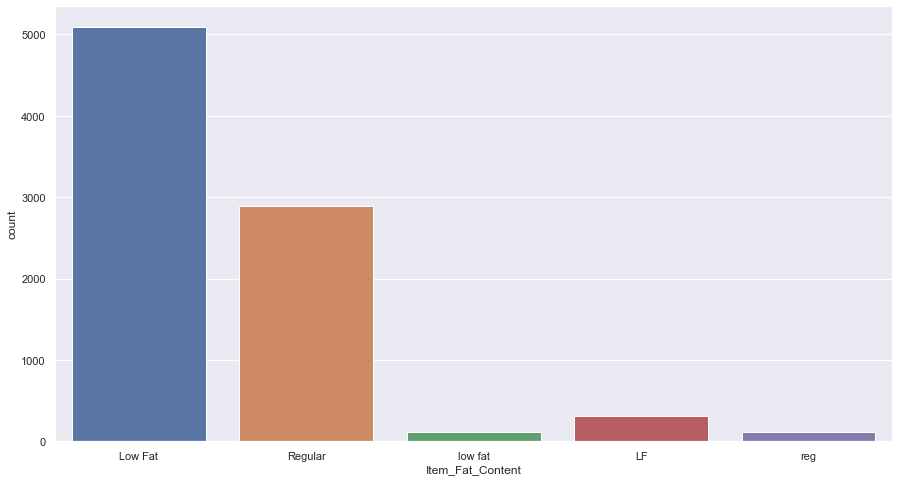

In [457]:
sns.countplot(data=df,x='Item_Fat_Content')
# in this column we will cleanse it as LF=Low fat , reg=Regular , low fat=Low Fat

In [458]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [459]:
def manipluate_itemfat(i):
    if i in ['Low Fat','LF','low fat']:
        return 'Low Fat'
    elif i in ['reg','Regular']:
        return 'Regular'

In [460]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(manipluate_itemfat)

In [461]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

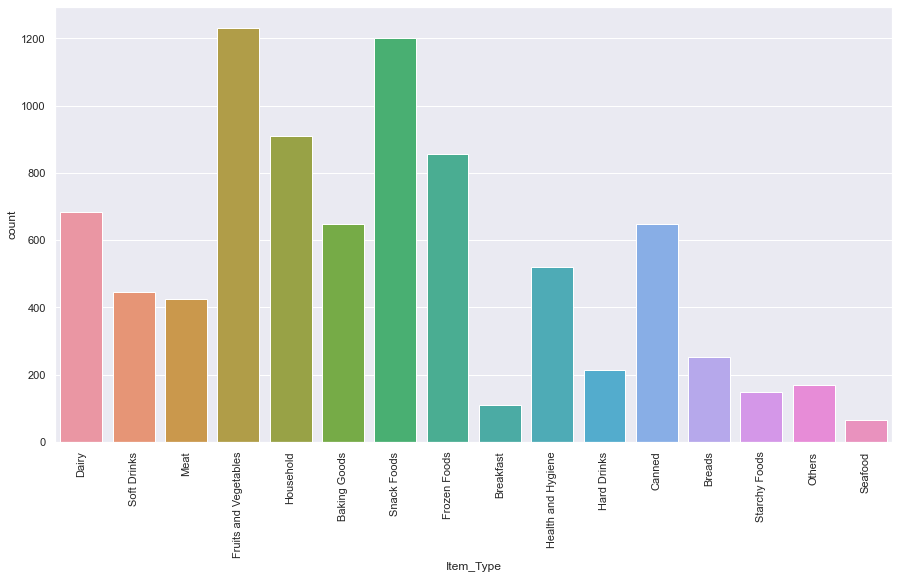

In [462]:
sns.countplot(data=df,x='Item_Type')
plt.xticks(rotation=90)
plt.show()
# No changes requrired

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

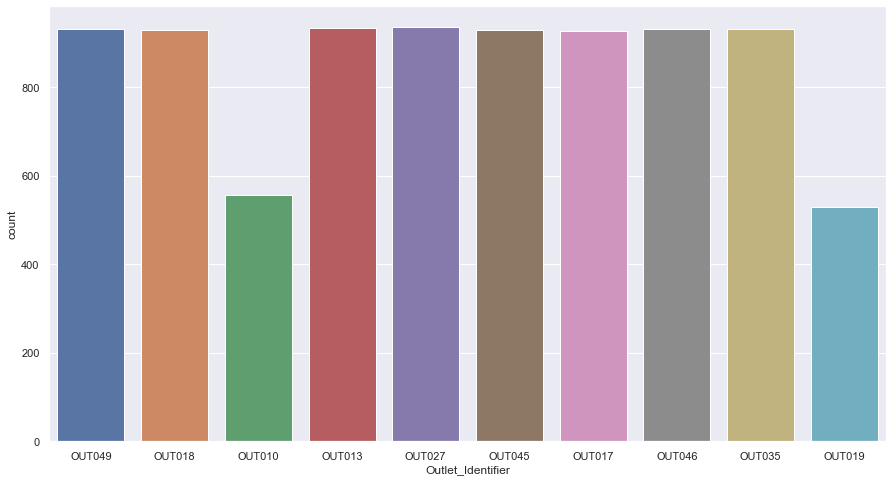

In [463]:
sns.countplot(data=df,x='Outlet_Identifier')
#seems good

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

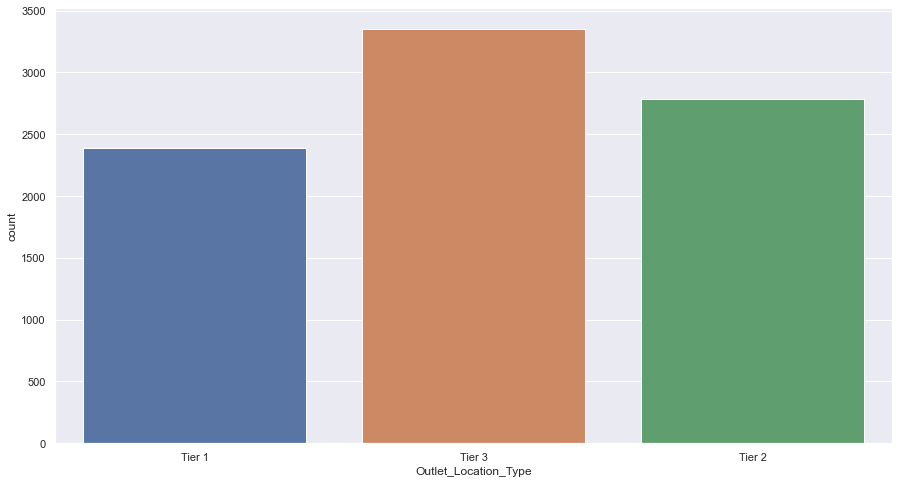

In [464]:
sns.countplot(data=df,x='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

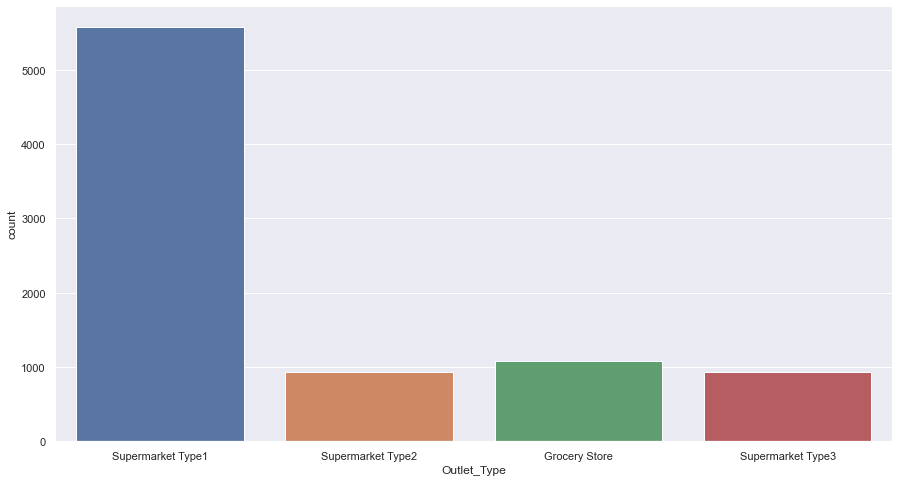

In [465]:
sns.countplot(data=df,x='Outlet_Type')

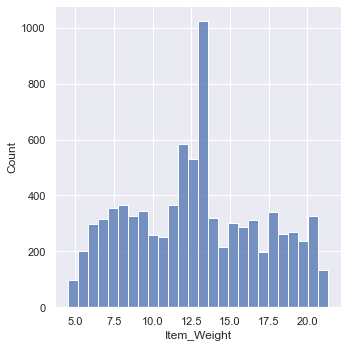

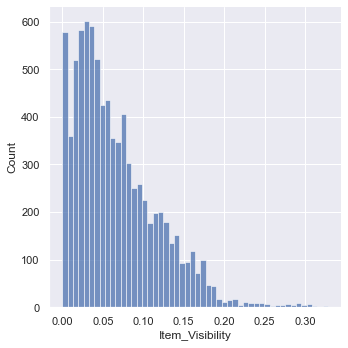

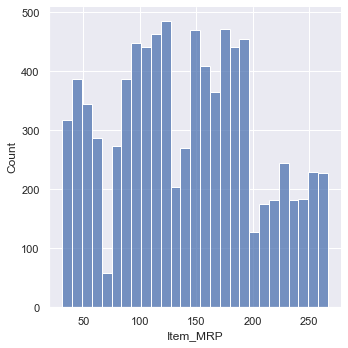

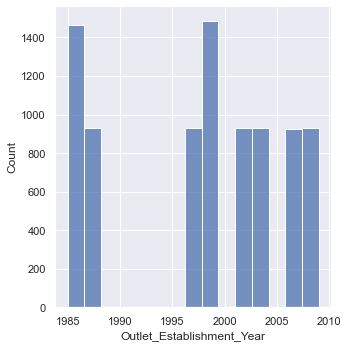

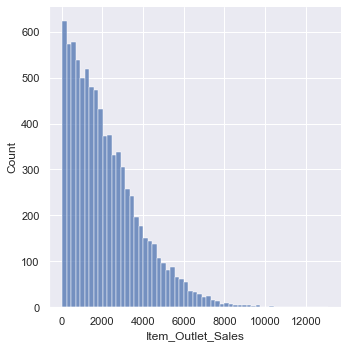

In [519]:
for feature in df.select_dtypes('number').columns:
    sns.displot(data=df,x=feature)

In [520]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


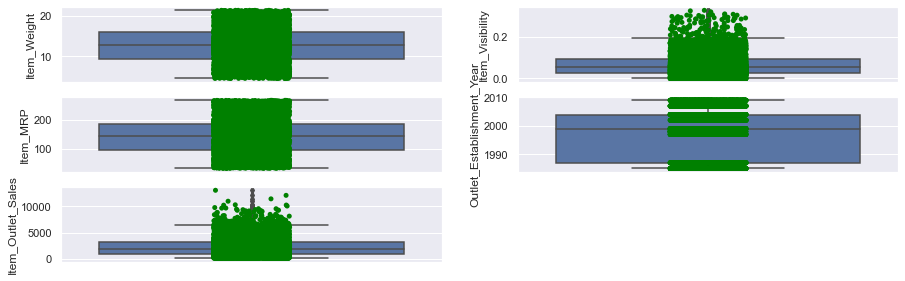

In [521]:
def print_boxplots():
    plt.subplot(5,2,1)
    sns.stripplot(data=df,y='Item_Weight',color='green')
    sns.boxplot(data=df,y='Item_Weight')
    plt.subplot(5,2,2)
    sns.stripplot(data=df,y='Item_Visibility',color='green')
    sns.boxplot(data=df,y='Item_Visibility')
    plt.subplot(5,2,3)
    sns.stripplot(data=df,y='Item_MRP',color='green')
    sns.boxplot(data=df,y='Item_MRP')
    plt.subplot(5,2,4)
    sns.stripplot(data=df,y='Outlet_Establishment_Year',color='green')
    sns.boxplot(data=df,y='Outlet_Establishment_Year')
    plt.subplot(5,2,5)
    sns.stripplot(data=df,y='Item_Outlet_Sales',color='green')
    sns.boxplot(data=df,y='Item_Outlet_Sales')
print_boxplots()

In [469]:
from datasist.structdata import detect_outliers

In [470]:
#indx_weight_outliers=detect_outliers(df,0,['Item_Weight'])

In [471]:
#df.loc[indx_weight_outliers,'Item_Weight']=np.nan

In [523]:
indx_visibilty_outliers=detect_outliers(df,0,['Item_Visibility'])

In [527]:
df.loc[indx_visibilty_outliers,'Item_Visibility']=np.nan

In [528]:
indx_sales_outliers=detect_outliers(df,0,['Item_Outlet_Sales'])

In [529]:
df.loc[indx_sales_outliers,'Item_Outlet_Sales']=np.nan

In [530]:
#handling outleirs
for i in ['Item_Visibility','Item_Outlet_Sales']:
    df[i]=df.groupby('Item_Type')[i].apply(lambda f:f.fillna(f.mean()))
    
#df['Item_Weight']=df.groupby(by=['Item_Type'])['Item_Outlet_Sales'].apply(lambda i:i.fillna(i.mean))

In [531]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

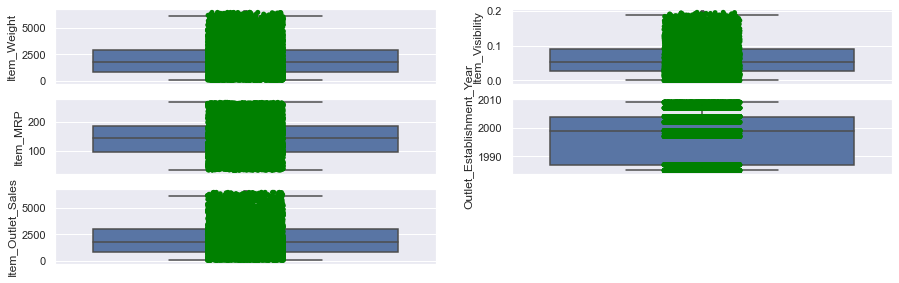

In [478]:
print_boxplots()

In [308]:
#Deal with outliers
#q1=df['Item_Weight'].quantile(0.25)
#q2=df['Item_Weight'].quantile(0.5)
#q3=df['Item_Weight'].quantile(0.75)
#iqr=q3-q1

In [129]:
#the top ten items type in sales for each outlet type

In [130]:
idx=df.groupby(by=['Item_Type','Outlet_Type']).sum()['Item_Outlet_Sales'].sort_values(ascending=False).head(10).index

In [131]:
item_type=[]
for i,x in idx:
    item_type.append(i)

In [132]:
top_ten=df[df['Item_Type'].isin(item_type)]

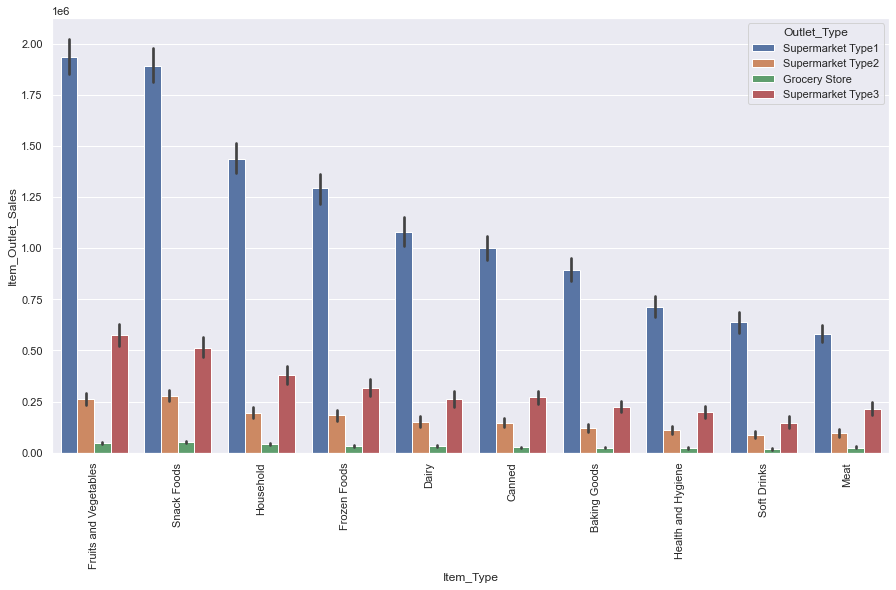

In [133]:
sns.barplot(data=top_ten,hue='Outlet_Type',y='Item_Outlet_Sales',x='Item_Type',estimator=sum,order=item_type)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

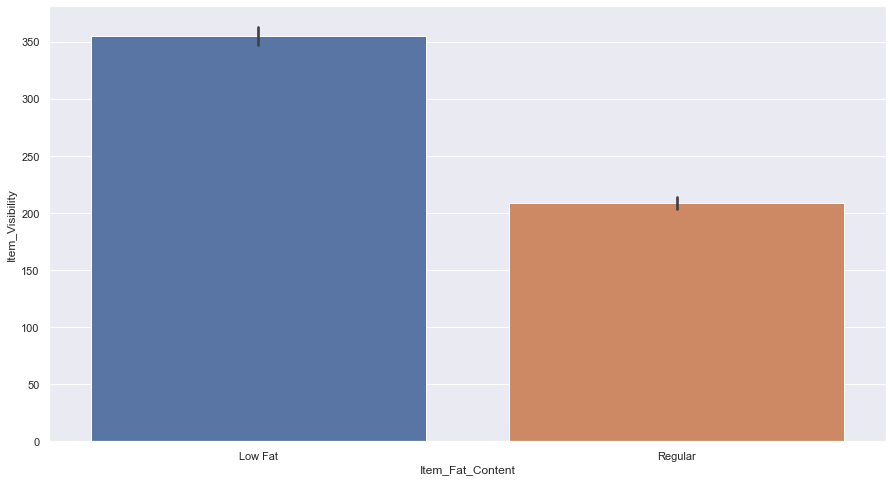

In [134]:
## Find the visibility of the item among the fat categories  
sns.barplot(data=df,x='Item_Fat_Content',y='Item_Visibility',estimator=sum)

## <font color='red'> Thank You!